# Sentiment Classification & How To "Frame Problems" for a Neural Network

by Andrew Trask

- **Twitter**: @iamtrask
- **Blog**: http://iamtrask.github.io

### What You Should Already Know

- neural networks, forward and back-propagation
- stochastic gradient descent
- mean squared error
- and train/test splits

### Where to Get Help if You Need it
- Re-watch previous Udacity Lectures
- Leverage the recommended Course Reading Material - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) (40% Off: **traskud17**)
- Shoot me a tweet @iamtrask


### Tutorial Outline:

- Intro: The Importance of "Framing a Problem"


- Curate a Dataset
- Developing a "Predictive Theory"
- **PROJECT 1**: Quick Theory Validation


- Transforming Text to Numbers
- **PROJECT 2**: Creating the Input/Output Data


- Putting it all together in a Neural Network
- **PROJECT 3**: Building our Neural Network


- Understanding Neural Noise
- **PROJECT 4**: Making Learning Faster by Reducing Noise


- Analyzing Inefficiencies in our Network
- **PROJECT 5**: Making our Network Train and Run Faster


- Further Noise Reduction
- **PROJECT 6**: Reducing Noise by Strategically Reducing the Vocabulary


- Analysis: What's going on in the weights?

# Lesson: Curate a Dataset

In [1]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [2]:
len(reviews)

25000

In [3]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [4]:
labels[0]

'POSITIVE'

# Lesson: Develop a Predictive Theory

In [5]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# Project 1: Quick Theory Validation

In [6]:
from collections import Counter
import numpy as np

In [7]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [8]:
for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [9]:
positive_counts.most_common()

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

In [10]:
pos_neg_ratios = Counter()

for term,cnt in list(total_counts.most_common()):
    if(cnt > 100):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

for word,ratio in pos_neg_ratios.most_common():
    if(ratio > 1):
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log((1 / (ratio+0.01)))

In [11]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 4.6913478822291435),
 ('paulie', 4.0775374439057197),
 ('felix', 3.1527360223636558),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.8067217286092401),
 ('victoria', 2.6810215287142909),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.5389738710582761),
 ('flawless', 2.451005098112319),
 ('superbly', 2.2600254785752498),
 ('perfection', 2.1594842493533721),
 ('astaire', 2.1400661634962708),
 ('captures', 2.0386195471595809),
 ('voight', 2.0301704926730531),
 ('wonderfully', 2.0218960560332353),
 ('powell', 1.9783454248084671),
 ('brosnan', 1.9547990964725592),
 ('lily', 1.9203768470501485),
 ('bakshi', 1.9029851043382795),
 ('lincoln', 1.9014583864844796),
 ('refreshing', 1.8551812956655511),
 ('breathtaking', 1.8481124057791867),
 ('bourne', 1.8478489358790986),
 ('lemmon', 1.8458266904983307),
 ('delightful', 1.8002701588959635),
 ('flynn', 1.7996646487351682),
 ('andrews', 1.7764919970972666),
 ('homer', 1.7692866133759964),
 ('beautifully', 1.7626953362841438),
 ('socc

In [12]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('boll', -4.0778152602708904),
 ('uwe', -3.9218753018711578),
 ('seagal', -3.3202501058581921),
 ('unwatchable', -3.0269848170580955),
 ('stinker', -2.9876839403711624),
 ('mst', -2.7753833211707968),
 ('incoherent', -2.7641396677532537),
 ('unfunny', -2.5545257844967644),
 ('waste', -2.4907515123361046),
 ('blah', -2.4475792789485005),
 ('horrid', -2.3715779644809971),
 ('pointless', -2.3451073877136341),
 ('atrocious', -2.3187369339642556),
 ('redeeming', -2.2667790015910296),
 ('prom', -2.2601040980178784),
 ('drivel', -2.2476029585766928),
 ('lousy', -2.2118080125207054),
 ('worst', -2.1930856334332267),
 ('laughable', -2.172468615469592),
 ('awful', -2.1385076866397488),
 ('poorly', -2.1326133844207011),
 ('wasting', -2.1178155545614512),
 ('remotely', -2.111046881095167),
 ('existent', -2.0024805005437076),
 ('boredom', -1.9241486572738005),
 ('miserably', -1.9216610938019989),
 ('sucks', -1.9166645809588516),
 ('uninspired', -1.9131499212248517),
 ('lame', -1.9117232884159072),

# Transforming Text into Numbers

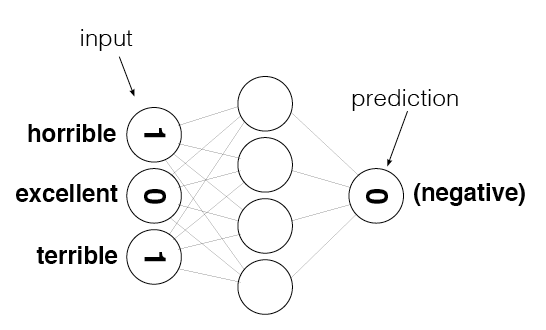

In [20]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='./sentiment_network/sentiment_network.png')

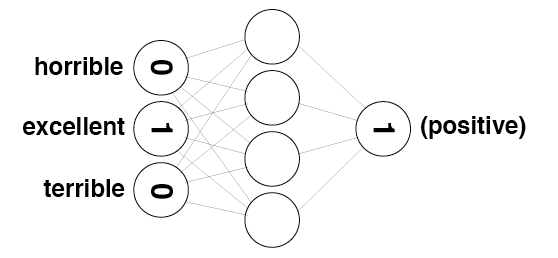

In [19]:
review = "The movie was excellent"

Image(filename='./sentiment_network/sentiment_network_pos.png')

# Project 2: Creating the Input/Output Data

In [22]:
vocab = set(total_counts.keys())
vocab_size = len(vocab)
print(vocab_size)

74074


In [23]:
list(vocab)

['',
 'satisfy',
 'rawls',
 'venerable',
 'worshipers',
 'sac',
 'aerobics',
 'izo',
 'kureshi',
 'aholes',
 'bleu',
 'renal',
 'gainsay',
 'remakes',
 'sasural',
 'warnicki',
 'rader',
 'whilhelm',
 'genuingly',
 'hemmings',
 'convergent',
 'coterie',
 'subversives',
 'solipsism',
 'snowman',
 'drion',
 'solder',
 'haj',
 'lobster',
 'luting',
 'hilly',
 'curdled',
 'vu',
 'courts',
 'sidetrack',
 'vosen',
 'melisa',
 'superstitions',
 'built',
 'rattner',
 'shroyer',
 'liman',
 'talor',
 'nay',
 'nada',
 'colombia',
 'georges',
 'cal',
 'ohhh',
 'stinkeye',
 'warden',
 'keating',
 'stilts',
 'neighbourliness',
 'arther',
 'gretzky',
 'radiologist',
 'wafty',
 'youuuu',
 'lackies',
 'befouling',
 'sloppish',
 'neul',
 'daimen',
 'paraday',
 'manifestly',
 'helmut',
 'carves',
 'bart',
 'scribe',
 'griminess',
 'opps',
 'laughters',
 'plath',
 'ebeneezer',
 'also',
 'stretch',
 'kirkland',
 'liev',
 'excuse',
 'cinmas',
 'sculptured',
 'devgans',
 'abounds',
 'comdie',
 'actorsactresse

In [24]:
import numpy as np

layer_0 = np.zeros((1,vocab_size))
layer_0

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

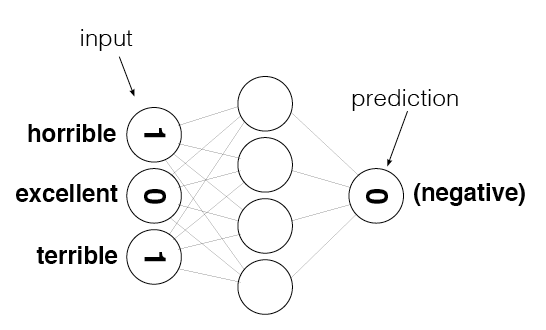

In [25]:
from IPython.display import Image
Image(filename='./sentiment_network/sentiment_network.png')

In [26]:
word2index = {}

for i,word in enumerate(vocab):
    word2index[word] = i
word2index

{'': 0,
 'satisfy': 1,
 'venerable': 3,
 'worshipers': 4,
 'kureshi': 8,
 'aholes': 9,
 'izo': 7,
 'rawls': 2,
 'bleu': 10,
 'renal': 11,
 'gainsay': 12,
 'remakes': 13,
 'petron': 37106,
 'sasural': 14,
 'warnicki': 15,
 'rader': 16,
 'genuingly': 18,
 'hemmings': 19,
 'coterie': 21,
 'solipsism': 23,
 'haj': 27,
 'drion': 25,
 'solder': 26,
 'lobster': 28,
 'luting': 29,
 'pom': 37109,
 'overruled': 68793,
 'hilly': 30,
 'sac': 5,
 'sidetrack': 34,
 'vosen': 35,
 'courts': 33,
 'surplus': 58145,
 'aerobics': 6,
 'melisa': 36,
 'superstitions': 37,
 'demean': 61904,
 'rattner': 39,
 'shroyer': 40,
 'liman': 41,
 'rites': 47751,
 'nay': 43,
 'nada': 44,
 'georges': 46,
 'cal': 47,
 'ohhh': 48,
 'warden': 50,
 'keating': 51,
 'stilts': 52,
 'neighbourliness': 53,
 'elegance': 12289,
 'arther': 54,
 'radiologist': 56,
 'gathering': 24826,
 'wafty': 57,
 'youuuu': 58,
 'lackies': 59,
 'befouling': 60,
 'sloppish': 61,
 'neul': 62,
 'adorible': 49568,
 'helmut': 66,
 'manifestly': 65,
 'sc

In [27]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [28]:
layer_0

array([[ 18.,   0.,   0., ...,   0.,   0.,   0.]])

In [29]:
def get_target_for_label(label):
    if(label == 'POSITIVE'):
        return 1
    else:
        return 0

In [30]:
labels[0]

'POSITIVE'

In [31]:
get_target_for_label(labels[0])

1

In [32]:
labels[1]

'NEGATIVE'

In [33]:
get_target_for_label(labels[1])

0

# Project 3: Building a Neural Network

- Start with your neural network from the last chapter
- 3 layer neural network
- no non-linearity in hidden layer
- use our functions to create the training data
- create a "pre_process_data" function to create vocabulary for our training data generating functions
- modify "train" to train over the entire corpus

### Where to Get Help if You Need it
- Re-watch previous week's Udacity Lectures
- Chapters 3-5 - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) - (40% Off: **traskud17**)

In [152]:
import sys
import time

class SentimentNetwork:
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):
        
        np.random.seed(1)
        
        self.pre_process_data(reviews, labels)
        
        self.init_network( self.review_vocab_size, hidden_nodes, 1, learning_rate)
        
    def pre_process_data(self, reviews, labels):
        
        #create vocab of reviews
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        #get size of review vocab
        self.review_vocab_size = len(review_vocab)
        
        #create vocab of labels
        label_vocab = set()
        for label in labels:
            vocab.add(label)
        self.label_vocab = list(label_vocab)
        #get label vocab size
        self.label_vocab_size = len(label_vocab)
        
        #map words in review_vocab to permanent indices
        self.word2index = {}
        for i,word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        #map labels in labels_vocab to permanent indices
        self.labels2index = {}
        for i,label in enumerate(self.label_vocab):
            self.labels2index[label] = i
        
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):

        
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = self.review_vocab_size
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
#         self.weights_0_1 = np.random.normal(0.0, self.hidden_nodes**-0.5, 
#                                                 (self.hidden_nodes, self.input_nodes))

        self.weights_0_1 = np.zeros((self.hidden_nodes, self.input_nodes))


        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.output_nodes, self.hidden_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,self.input_nodes))
        
    def update_input_layer(self, review):
    
        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            self.layer_0[0][self.word2index[word]] += 1
            
    def get_target_for_label(self, label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def sigmoid_2_derivative(self, x):
        return ( x * (1 - x) )

    def train(self, training_reviews, training_labels):
        
        assert len(training_reviews) == len(training_labels)
        
        correct_so_far = 0
        
        start = time.time()
        
        #for all reviews/labels in training set
        for i in range(len(training_reviews)):
            review = training_reviews[i]
            label = training_labels[i]

            #### Implement the forward pass here ####
            ### Forward pass ###
            
            # Create input vector
            self.update_input_layer(review)

            #  Hidden layer
            layer_1 = self.weights_0_1.dot(self.layer_0.T)

            # Output layer
            layer_2 = self.sigmoid(self.weights_1_2.dot(layer_1))
        
            #### Implement the backward pass here ####
            ### Backward pass ###

            #  Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_2_derivative(layer_2)
            
            #  Backpropagated error
            layer_1_error = np.dot(layer_2_delta, self.weights_1_2)  # errors propagated to the hidden layer
            layer_1_delta = layer_1_error 

            # Update the weights
            self.weights_1_2 -= self.learning_rate *  layer_2_delta * layer_1.T # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.learning_rate * layer_1_delta.T * layer_0 # update input-to-hidden weights with gradient descent step

            if(np.abs(layer_2_error) < 0.5): #if prediciton in correct half of sigmoid
                correct_so_far += 1 #add to number correctly guess
                
            reviews_per_second = i / float(time.time() - start)

            #write progress to screen
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
                
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")        
    def run(self, review):
        # Run a forward pass through the network
        inputs = self.update_input_layer(review)
        
        #### Implement the forward pass ####

        #  Hidden layer
        layer_1 = self.weights_0_1.dot(self.layer_0.T)

        # Output layer
        layer_2 = self.sigmoid(self.weights_1_2.dot(layer_1))

        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"

In [153]:
#create network with entire reviews corpus vocab
mlp = SentimentNetwork(reviews,labels, learning_rate=0.1)

In [154]:
# evaluate our model before training (just to show how horrible it is)
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):1974.% #Correct:500 #Tested:1000 Testing Accuracy:50.0%

In [155]:
# train network on all but last 1000 reviews
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):582.6 #Correct:1250 #Trained:2501 Training Accuracy:49.9%
Progress:17.1% Speed(reviews/sec):581.3 #Correct:2053 #Trained:4108 Training Accuracy:49.9%

KeyboardInterrupt: 

In [158]:
#create network with higher learning rate
mlp = SentimentNetwork(reviews,labels, learning_rate=0.01)

In [159]:
# train network on all but last 1000 reviews
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):581.1 #Correct:1185 #Trained:2501 Training Accuracy:47.3%
Progress:20.8% Speed(reviews/sec):578.5 #Correct:2370 #Trained:5001 Training Accuracy:47.3%
Progress:29.0% Speed(reviews/sec):579.0 #Correct:3289 #Trained:6979 Training Accuracy:47.1%

KeyboardInterrupt: 